# Notebook Introduction

## Notebooks
* This is a [Jupyter Notebook](http://jupyter.org) displaying [IPython](http://ipython.org) programming code.
* A notebook is a collection of cells, some of which contain text, such as this one, and some of which contain executable program code.  
* Text cells are called 'markdown' cells because that is the markup language used to specify formatting.
* When you click in a cell, a pulldown menu in the menu bar above shows you what kind of a cell it is.
* Cells can be editted.  You do this by double-clicking within text cells, and single clicking within code cells (though double-clicking seems to be harmless in code cells).
* Cells are executed, or 'run'.  When this happens, text cells are formatted and displayed and code cells are evaluated and the results displayed immediately below the cell.
* To run all cells, select menu item **Cell / Run All**, above.
* To run a single cell, click in the cell text area so that it is highlighted, perhaps change the text, then do one of:
  - Select **Cell / Run** or type 'Ctrl-Enter' (this retains focus on the current cell)
  - Select **Cell / Run and Select Below** or type 'Shift-Enter' (this moves focus to the next cell)
  - Select **Cell / Run and Insert Below** or type 'Alt-Enter' (this inserts a new cell after the current one)

  
## The Notebook Server
* On the '`tmpnb`' notebook server (http://holtz2.cee.carleton.ca:8000/):
  - Any changes you make will be visible to you only; you will not change the master copies nor will your changes be visible to anyone else.
  - Any changes you make will disappear after about 10 minues of inactivity.
* See the **Help** menu for more info.

## Notebook Example
#### Feel free to play below:
Starting at the following code cell, labelled 'In [1]', click inside the text area, change it, then type '**Shift-Enter**'.

In [1]:
a = 3.
b = 4.
(a*a + b*b)**0.5

5.0

The following three lines setup plotting to be in-line in the notebook, and import the plotting library and the
numerical computations (array computations) library.  After this, the notebook is a MATLAB work-alike.

Lines beginning with '%' (or '%%') are special commands added to extend the Python programming language.  Execute '%matplotlib?' in a cell to see what this one does.

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

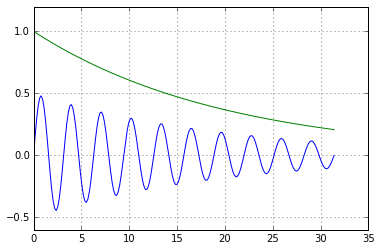

In [3]:
x = np.linspace(0.,10*np.pi,200)  # generate a whole bunch of x values, evenly spaced
plt.plot( x, np.sin(x)*np.cos(x)*np.exp(-x/20.), x, np.exp(-x/20.))
plt.grid(True);

In [4]:
# alternatively:
from numpy import pi,linspace, sin, cos, exp

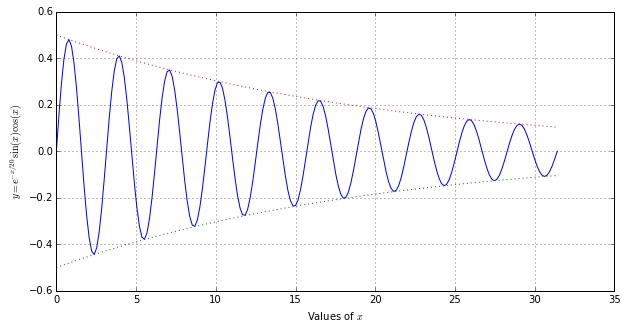

In [5]:
x = linspace(0.,10*pi,200)
plt.figure(figsize=(10,5))
plt.plot( x, sin(x)*cos(x)*exp(-x/20.), x, 0.5*exp(-x/20.),'r:',  x, -0.5*exp(-x/20.),'g:')
plt.xlabel('Values of $x$')
plt.ylabel('$y = e^{-x/20} \sin(x)\cos(x)$')
plt.grid(True);

That was a plot of

$$ e^{-x/20} \sin x \cos x $$

with $0 \le x \le 10 \pi$, showing the limits of the oscillations.

This is a `markdown` cell; it can display text, math and images.  Double-click to edit and then run the cell to format it.

#### Now for some symbolic algebra:

In [6]:
import sympy as sy
sy.init_printing(use_latex='mathjax')

By making variables 'symbolic', expressions are not evaluated but are retained as algebraic expressions:

In [7]:
sy.var('t')   # make 't' a symbolic variable
a = sy.exp(-t/20)*sy.sin(t)*sy.cos(t)   # the value of 'a' is a symbolic expression
a                                       # display the value of 'a'

 -t               
 ───              
  20              
ℯ   ⋅sin(t)⋅cos(t)

Now we can form the indefinite integral of that expression:

In [8]:
ai = a.integrate(t)
ai

     -t                -t                       -t         
     ───               ───                      ───        
      20    2           20                       20    2   
400⋅ℯ   ⋅sin (t)   20⋅ℯ   ⋅sin(t)⋅cos(t)   400⋅ℯ   ⋅cos (t)
──────────────── - ───────────────────── - ────────────────
      1601                  1601                 1601      

And differentiate that result.  We get the original expression back, as we should:

In [9]:
ai.diff(t)

 -t               
 ───              
  20              
ℯ   ⋅sin(t)⋅cos(t)

Now we want to find values of $t$ for which the indefinite integral is 0 (zero):

In [10]:
s = sy.solve([ai],(t,))  # find values of t for which the integral is 0
s

⎡⎛       ⎛                       ___________________⎞ ⎞  ⎛      ⎛             
⎢⎜       ⎜                      ╱     ______        ⎟ ⎟  ⎜      ⎜             
⎢⎜       ⎜                     ╱    ╲╱ 1601    1601 ⎟ ⎟  ⎜      ⎜             
⎢⎜       ⎜         ______     ╱   - ──────── + ──── ⎟ ⎟  ⎜      ⎜       ______
⎢⎜       ⎜  1    ╲╱ 1601    ╲╱        200      200  ⎟ ⎟  ⎜      ⎜1    ╲╱ 1601 
⎢⎜-2⋅    ⎜- ── + ──────── + ────────────────────────⎟,⎟, ⎜2⋅    ⎜── + ────────
⎢⎜       ⎝  40      40                 2            ⎠ ⎟  ⎜      ⎝40      40   
⎣⎝   atan                                             ⎠  ⎝  atan              

        _________________⎞ ⎞  ⎛      ⎛                       _________________
       ╱   ______        ⎟ ⎟  ⎜      ⎜                      ╱     ______      
      ╱  ╲╱ 1601    1601 ⎟ ⎟  ⎜      ⎜                     ╱    ╲╱ 1601    160
     ╱   ──────── + ──── ⎟ ⎟  ⎜      ⎜    ______          ╱   - ──────── + ───
   ╲╱      200      200  ⎟ ⎟  ⎜      ⎜  ╲╱ 1601    

The result is a list of 4 tuples, meaning there are 4 solutions.  Each tuple is a sequence of values of
each of the 'solved for' variables that makes the expression zero.  Here we have only one variable, so each
tuple has one value of that variable.  In other words '`s[`*i*`][0]`' extracts the value of $t$
in the $i$th solution.  Check the solution by back-substituting that value for $t$ into the integral:

In [11]:
ai.subs({t:s[0][0]})   # substitute in the first solution

           ⎛                       ___________________⎞                       
           ⎜                      ╱     ______        ⎟                       
           ⎜                     ╱    ╲╱ 1601    1601 ⎟                       
           ⎜         ______     ╱   - ──────── + ──── ⎟                       
           ⎜  1    ╲╱ 1601    ╲╱        200      200  ⎟                       
           ⎜- ── + ──────── + ────────────────────────⎟     ⎛      ⎛          
           ⎝  40      40                 2            ⎠     ⎜      ⎜          
       atan                                                 ⎜      ⎜          
       ────────────────────────────────────────────────     ⎜      ⎜         _
                              10                            ⎜      ⎜  1    ╲╱ 
  400⋅ℯ                                                ⋅    ⎜2⋅    ⎜- ── + ───
                                                            ⎜      ⎝  40      
                                                    

Unfortunately, the result is too complex for sympy to algebraicly simplify.  Resort to numerical evaluation to ensure that we get a zero:

In [12]:
_.n(1000)    # evaluate the above to 1000 digits of precision

0.e-2009

In [13]:
# well, that is pretty close to zero ...

And finally, display all 4 roots numerically:

In [14]:
[ss[0].n() for ss in s]

[-2.34369709338288, 2.3686918870018, 0.797895560206908, -0.772900766587988]

### Promotion

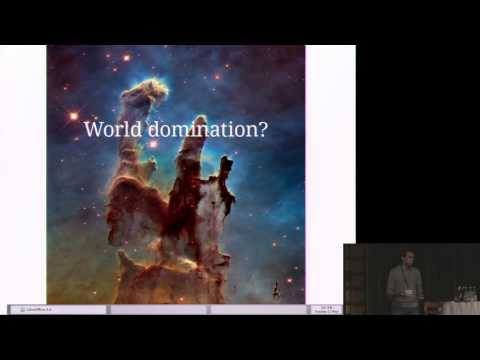

In [15]:
from IPython.display import display, YouTubeVideo
vid = YouTubeVideo("oP9Qcjq8UVI")
vid